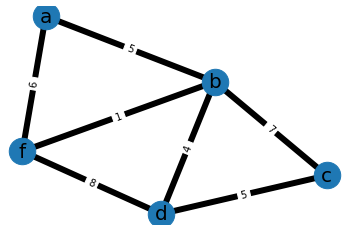

dijkstra_output: ['a', 'b', 'c']
----------------------prim----------------------
[('a', 'b', {'weight': 5}), ('b', 'd', {'weight': 4}), ('b', 'f', {'weight': 1}), ('c', 'd', {'weight': 5})]
----------------------Kruskal----------------------
[('a', 'b', {'weight': 5}), ('b', 'd', {'weight': 4}), ('b', 'f', {'weight': 1}), ('c', 'd', {'weight': 5})]


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

G.add_edge("a", "b", weight=5)
G.add_edge("c", "d", weight=4)
G.add_edge("a", "f", weight=6)
G.add_edge("c", "b", weight=7)
G.add_edge("c", "d", weight=5)
G.add_edge("f", "d", weight=8)
G.add_edge("f", "b", weight=1)
G.add_edge("b", "d", weight=4)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.axis("off")
plt.show()

dijkstra_output = list(nx.dijkstra_path(G,"a","c"))
print(f"dijkstra_output: {dijkstra_output}")

prim_output = nx.algorithms.tree.mst.minimum_spanning_tree(G,algorithm='prim')
#prim_output(f"prim_output: {prim_output}")
print("----------------------prim----------------------")
print(sorted(prim_output.edges(data=True)))

kruskal_output = nx.algorithms.tree.mst.minimum_spanning_tree(G,algorithm='kruskal')
print("----------------------Kruskal----------------------")
print(sorted(kruskal_output.edges(data=True)))